# Geographic Locations of Data Centers 

This notebook provides a visualization of the geographic locations of the data centers for various cloud providers to give a sense of the geographic coverage of cloud computing. The dataset can be found in the `fixtures` directory, and contains general locations for the following providers:

- Amazon Web Services
- Google Cloud Compute 
- Microsoft Azure 
- Digital Ocean 
- Linode 

In [1]:
%matplotlib notebook 

import pandas as pd 
import geopandas as geo 
import matplotlib.pyplot as plt 

from shapely.geometry import Point 

In [9]:
def load_data(path="fixtures/locations.csv"):
    df = pd.read_csv(path)
    df['Available'] = df['Available'].apply(lambda v: v=='y')
    df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
    df['Coordinates'] = df['Coordinates'].apply(Point)
    
    gdf = geo.GeoDataFrame(df, geometry='Coordinates')
    return gdf 

cities = load_data()
cities.head()

,Provider,Location,Name,Notes,Available,Latitude,Longitude,Coordinates
0,Microsoft Azure,"Abu Dhabi, UAE",UAE Central,NaN,False,24.488180,54.354950,POINT (54.35495 24.48818)
1,Digital Ocean,"Amsterdam, Netherlands",AMS2,NaN,True,52.370216,4.895168,POINT (4.895168 52.370216)
2,Digital Ocean,"Amsterdam, Netherlands",AMS3,NaN,True,52.370216,4.895168,POINT (4.895168 52.370216)
3,AWS,"Ashburn, Virginia",us-east-1,6 availability zones,True,39.042370,-77.487240,POINT (-77.48724 39.04237)
4,Google Cloud,"Ashburn, Virginia",us-east4,3 availability zones,True,39.042370,-77.487240,POINT (-77.48724 39.04237)


<IPython.core.display.Javascript object>


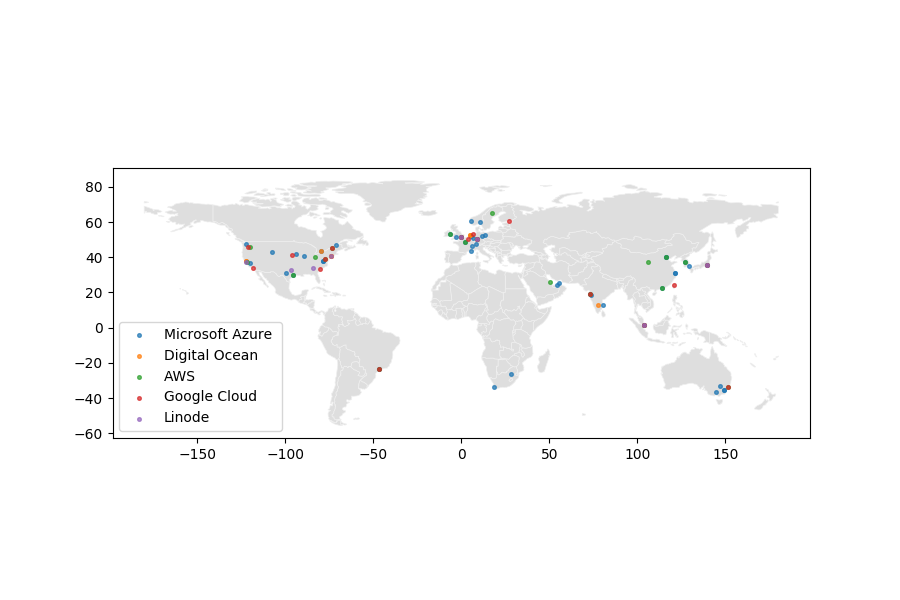

In [39]:
_, ax = plt.subplots(figsize=(9,6))
ax.set_aspect('equal')

world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
ax = world.plot(ax=ax, color='#DEDEDE', edgecolor="#EFEFEF", linewidth=0.5)

for provider in cities['Provider'].unique():
    cities[cities['Provider']==provider].plot(ax=ax, marker='o', markersize=7, alpha=0.7, label=provider)

ax.legend()